In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy as sp
from sympy.solvers import solve
from sympy import Symbol
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import pickle

In [24]:
with open('/Users/ranvirrana/Dropbox/ccs2020/latency_bound_adv/dict1.pickle', 'rb') as handle:
    var1 = pickle.load(handle)
with open('/Users/ranvirrana/Dropbox/ccs2020/latency_bound_adv/dict2.pickle', 'rb') as handle:
    var2 = pickle.load(handle)
with open('/Users/ranvirrana/Dropbox/ccs2020/latency_bound_adv/dict3.pickle', 'rb') as handle:
    var3 = pickle.load(handle)    
with open('/Users/ranvirrana/Dropbox/ccs2020/latency_bound_adv/dict4.pickle', 'rb') as handle:
    var4 = pickle.load(handle)
with open('/Users/ranvirrana/Dropbox/ccs2020/latency_bound_adv/dict5.pickle', 'rb') as handle:
    var5 = pickle.load(handle)
#with open('/Users/ranvirrana/Dropbox/fc21/sim_plots/latency_bound_adv/dict_constrained.pickle', 'rb') as handle:
#    var_c = pickle.load(handle)
#with open('/Users/ranvirrana/Dropbox/fc21/sim_plots/latency_bound_adv/dict_un_constrained.pickle', 'rb') as handle:
#    var_uc = pickle.load(handle)
with open('/Users/ranvirrana/Dropbox/sigmetrics22/sim_plots/latency_bound_adv/dict_constrained.pickle', 'rb') as handle:
    var_sig22_c = pickle.load(handle)
with open('/Users/ranvirrana/Dropbox/sigmetrics22/sim_plots/latency_bound_adv/dict_un_constrained.pickle', 'rb') as handle:
    var_sig22_uc = pickle.load(handle)
with open('/Users/ranvirrana/Dropbox/sigmetrics22/sim_plots/latency_bound_adv/dict_constrained_36_6.pickle', 'rb') as handle:
    var_sig22_36_6_c = pickle.load(handle)
with open('/Users/ranvirrana/Dropbox/sigmetrics22/sim_plots/latency_bound_adv/dict_un_constrained_36_6.pickle', 'rb') as handle:
    var_sig22_36_6_uc = pickle.load(handle)
with open('/Users/ranvirrana/Dropbox/sigmetrics22/sim_plots/latency_bound_adv/dict_target_tp_un_constrained.pickle', 'rb') as handle:
    var_sig22_target_tp_uc = pickle.load(handle)

In [25]:
T=1000
epoch_length=100
min_rt_list1 = []
for t in range(T):
    min_rt_list1.append(np.min(var1['avg_rt_list'][t]))
min_rt_list2 = []
for t in range(T):
    min_rt_list2.append(np.min(var2['avg_rt_list'][t]))
min_rt_list3 = []
for t in range(T):
    min_rt_list3.append(np.min(var3['avg_rt_list'][t]))
min_rt_list4 = []
for t in range(T):
    min_rt_list4.append(np.min(var4['avg_rt_list'][t]))
min_rt_list5 = []
for t in range(T):
    min_rt_list5.append(np.min(var5['avg_rt_list'][t]))
#min_rt_list_c = []
#for t in range(T):
#    min_rt_list_c.append(np.min(var_c['avg_rt_list'][epoch_length*t]))
#min_rt_list_uc = []
#for t in range(T):
#    min_rt_list_uc.append(np.min(var_uc['avg_rt_list'][epoch_length*t]))
min_rt_list_sig22_c = []
for t in range(T):
    min_rt_list_sig22_c.append(np.min(var_sig22_c['avg_rt_list'][epoch_length*t]))
min_rt_list_sig22_uc = []
for t in range(T):
    min_rt_list_sig22_uc.append(np.min(var_sig22_uc['avg_rt_list'][epoch_length*t]))
min_rt_list_sig22_36_6_c = []
for t in range(T):
    min_rt_list_sig22_36_6_c.append(np.min(var_sig22_36_6_c['avg_rt_list'][epoch_length*t]))
min_rt_list_sig22_36_6_uc = []
for t in range(T):
    min_rt_list_sig22_36_6_uc.append(np.min(var_sig22_36_6_uc['avg_rt_list'][epoch_length*t]))

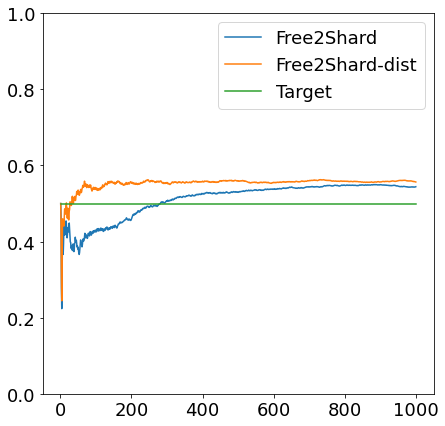

In [26]:
plt.figure(figsize=(7,7))
x_axis = np.arange(1,T+1,1)
y_axis_1 = np.array(min_rt_list_sig22_36_6_uc)
y_axis_2 = np.array(min_rt_list_sig22_36_6_c)
y_axis_3 = 0.5*np.ones((T))
plt.plot(x_axis, y_axis_1)
plt.plot(x_axis, y_axis_2)
plt.plot(x_axis, y_axis_3)
plt.legend(['Free2Shard','Free2Shard-dist','Target'],fontsize=18)
plt.ylim(0,1)
#plt.xlabel("Epoch:t",fontsize=14)
#plt.ylabel("Worst case honest fraction",fontsize=14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.title("Worst case shard throughput")
#plt.show()
#plt.savefig("/Users/ranvirrana/Dropbox/Sharding_Talk/simulation_plots/latency_bound_adv/worst_shard_tp.png")

plt.savefig("/Users/ranvirrana/Dropbox/sigmetrics22/sim_plots/latency_bound_adv/compare_worst_shard_real_tp12_36_6.pdf")

0.0213256722142


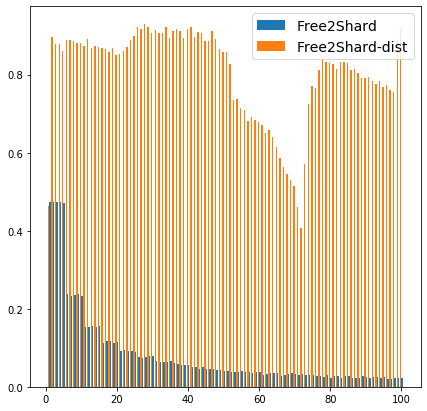

In [7]:
K=100
tp_mean_c = []
tp_mean_uc = []
x1 = np.arange(1.2,K+1.2,1)
x2 = np.arange(1,K+1)
for k in range(K):
    tp_mean_c.append(var_c['avg_rt_list'][99999][k])
    tp_mean_uc.append(var_uc['avg_rt_list'][99999][k])
plt.close()
plt.figure(figsize=(7,7))
plt.bar(x2+0.2, tp_mean_uc, bottom=0, width=0.4, align='center')
plt.bar(x2-0.2, tp_mean_c, bottom=0, width=0.4, align='center')
plt.legend(['Free2Shard','Free2Shard-dist'],fontsize=14)
#plt.show()
plt.savefig("/Users/ranvirrana/Dropbox/fc21/sim_plots/latency_bound_adv/avg_tp_6.pdf")
print(var_uc['avg_rt_list'][99999][99])

[ 734141.  734142.  734143.]


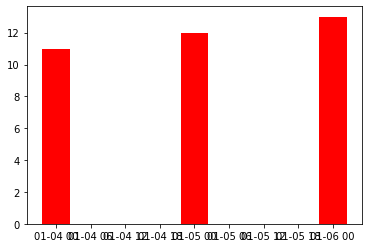

In [31]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

x = [
    datetime.datetime(2011, 1, 4, 0, 0),
    datetime.datetime(2011, 1, 5, 0, 0),
    datetime.datetime(2011, 1, 6, 0, 0)
]
x = date2num(x)

print(x)
y = [4, 9, 2]
z = [1, 2, 3]
k = [11, 12, 13]

ax = plt.subplot(111)
ax.bar(x, y, width=0.2, color='b', align='center')
ax.bar(x, z, width=0.2, color='g', align='center')
ax.bar(x, k, width=0.2, color='r', align='center')
ax.xaxis_date()

plt.show()

In [32]:
plt.figure(figsize=(7,7))
x_axis = np.arange(1,T+1,1)
y_axis_1 = np.array(min_rt_list3)
y_axis_2 = np.array(min_rt_list5)
y_axis_3 = 0.05*np.ones((T))
plt.plot(x_axis, y_axis_1)
plt.plot(x_axis, y_axis_2)
plt.plot(x_axis, y_axis_3)
plt.legend(['Free2Shard','Free2Shard-dist','Target'],fontsize=14)
plt.ylim(0,0.1)
plt.xlabel("Time:t",fontsize=14)
plt.ylabel("Worst case honest node fraction",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel("Time")
#plt.ylabel("Normalized Throughput")
#plt.title("Worst case shard throughput")
#plt.show()
#plt.savefig("/Users/ranvirrana/Dropbox/Sharding_Talk/simulation_plots/latency_bound_adv/worst_shard_tp.png")

plt.savefig("/Users/ranvirrana/Dropbox/ccs2020/latency_bound_adv/compare_worst_shard_tp35.pdf")

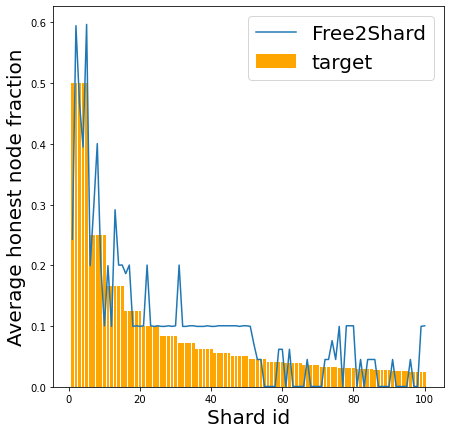

In [20]:
K=100
plt.close()
plt.figure(figsize=(7,7))
x_axis = np.arange(1,K+1,1)
y_axis_1 = np.array(var_sig22_target_tp_uc['avg_rt_list'][T-1])
y_axis_2 = np.array(var_sig22_target_tp_uc['target_tp_list'])
plt.plot(x_axis, y_axis_1)
#plt.plot(x_axis, y_axis_2)
plt.bar(x_axis, y_axis_2, bottom=0, color='orange')
plt.legend(['Free2Shard','target'],fontsize=20)
plt.xlabel("Shard id",fontsize=20)
plt.ylabel("Average honest node fraction",fontsize=20)
#plt.xlabel("Shards")
#plt.ylabel("Normalized throughput")
plt.show()
#plt.savefig("/Users/ranvirrana/Dropbox/sigmetrics22/latency_bound_adv/target_tp4.pdf")

In [38]:

avg_rt_list = var1['avg_rt_list']

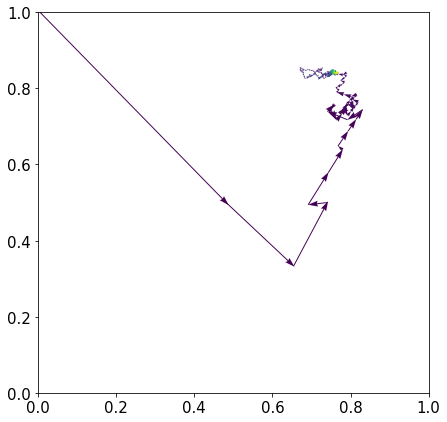

In [41]:
#shard_1=min_shard
#shard_2=min2_shard
shard_1=0
shard_2=1
x_avg = np.array(avg_rt_list)[:,shard_1]
y_avg = np.array(avg_rt_list)[:,shard_2]
U = np.zeros(T)
V = np.zeros(T)
time = np.arange(1,T+1,1)
widths = np.zeros(T)
for t in range(T-1):
    U[t] = (x_avg[t+1] - x_avg[t])
    V[t] = (y_avg[t+1] - y_avg[t])
    
fig1, ax1 = plt.subplots(figsize=(7,7))
#ax1.set_title('Arrows scale with plot width, not view')
Q = ax1.quiver(x_avg, y_avg, U, V, time, cmap='viridis', angles='xy', width=0.0025, scale=1.0, headwidth=6, headlength=10, headaxislength=9)
#qk = ax1.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
#print(U)
#print(x_avg)
#print(V)
#plt.xlim(0.4,0.6)
#plt.ylim(0.4,0.6)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#ax1.set_xlabel("Instantaneous TP min shard", fontsize=15)
#ax1.set_ylabel("Instantaneous TP 2nd shard", fontsize=15)
'''
norm = plt.Normalize(time.min(), time.max())
lc = LineCollection(, cmap='viridis', norm=norm)
lc.set_array(time)
#lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig1.colorbar(line, ax=ax1)
'''
#plt.show()
#plt.savefig("/Users/ranvirrana/Dropbox/Sharding_Talk/simulation_plots/rootK_min_adversary/min_shards_evo_vector_zoom.png")
plt.savefig("/Users/ranvirrana/Dropbox/ccs2020/latency_bound_adv/avg1.pdf")